<a href="https://colab.research.google.com/github/akhtarKhan8050/machine-learning-notes/blob/akhtarKhan8050-board_and_theory/ANN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, r2_score
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model


In [ ]:
data=pd.read_csv("Life Expectancy Data.csv")
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
data.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
cols=data.select_dtypes(include=['float64','int64']).columns
cols

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
for i in cols:
  print(i,data[i].value_counts())
  print("============")

Year Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64
Life expectancy  Life expectancy 
73.0    45
75.0    33
78.0    31
73.6    28
76.0    25
        ..
83.4     1
83.2     1
48.8     1
43.8     1
45.4     1
Name: count, Length: 362, dtype: int64
Adult Mortality Adult Mortality
12.0     34
14.0     30
16.0     29
11.0     25
138.0    25
         ..
717.0     1
723.0     1
715.0     1
686.0     1
665.0     1
Name: count, Length: 425, dtype: int64
infant deaths infant deaths
0      848
1      342
2      203
3      175
4       96
      ... 
89       1
91       1
100      1
106      1
110      1
Name: count, Length: 209, dtype: int64
Alcohol Alcohol
0.01     288
0.03      15
0.04      13
0.02      12
0.09      12
        ... 
10.79      1
11.61      1
11.44      1
10.91      1
3.98       1
Name: count, Length: 1076, d

In [ ]:
data['Country'].value_counts()

,count
Country,
Afghanistan,16
Albania,16
Algeria,16
Angola,16
Antigua and Barbuda,16
...,...
Monaco,1
Marshall Islands,1
Saint Kitts and Nevis,1


In [ ]:
data['Status'].value_counts()

,count
Status,
Developing,2426
Developed,512


In [ ]:
imputer=SimpleImputer(strategy='mean')
data[cols]=imputer.fit_transform(data[cols])

In [ ]:
data.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [ ]:
for column in data.columns:
    fig=px.box(data,y=column,title=f'<box plot for {column}')
    fig.update_layout(title=dict(text=f"box plot for {column}",x=0.5),boxmode='group')
    fig.show()

In [27]:
cols_to_handle_outliers=[
    'Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B',
    'Measles ',' BMI ','under-five deaths ',' HIV/AIDS',' thinness  1-19 years',' thinness 5-9 years',
    'Income composition of resources','Total expenditure','Total expenditure','Population','GDP','Diphtheria ','Polio','Schooling'

]

In [28]:
for col_name in cols_to_handle_outliers :
  q1=data[col_name].quantile(0.25)
  q3=data[col_name].quantile(0.75)
  iqr=q3-q1
  lower_limit=q1-1.5*iqr
  upper_limit=q3+1.5*iqr

  data[col_name]=np.where(data[col_name]<lower_limit,lower_limit,data[col_name])

In [29]:
fig=px.histogram(data,x='Year',color='Year')
fig.update_layout(title=dict(text="Histogram for Year",x=0.5),boxmode='group')
fig.show()

In [31]:
fig=px.histogram(data,x='Status',color='Status')
fig.update_layout(title=dict(text="Line plot for Status",x=0.5))
fig.show()

In [33]:
developing=data[data['Status']=='Developing']
fig=px.histogram(developing, x='Life expectancy ')
fig.update_layout(title_text=" Life expectancy  of dev. countries",xaxis_title='',yaxis_title='Count of ages',title_x=0.5)
fig.show()

In [34]:
developed=data[data['Status']=='Developed']
fig=px.histogram(developing, x='Life expectancy ')
fig.update_layout(title_text=" Life expectancy  of dev. countries",xaxis_title='',yaxis_title='Count of ages',title_x=0.5)
fig.show()

In [36]:
fig=px.bar(data.groupby('Status',as_index=False).agg({'Life expectancy ':'mean'}),x='Status',y='Life expectancy ',color='Status')
fig.update_layout(title_text='Average life expectancy by Status',xaxis_title='',yaxis_title='Life expectancy',title_x=0.5)
fig.show()

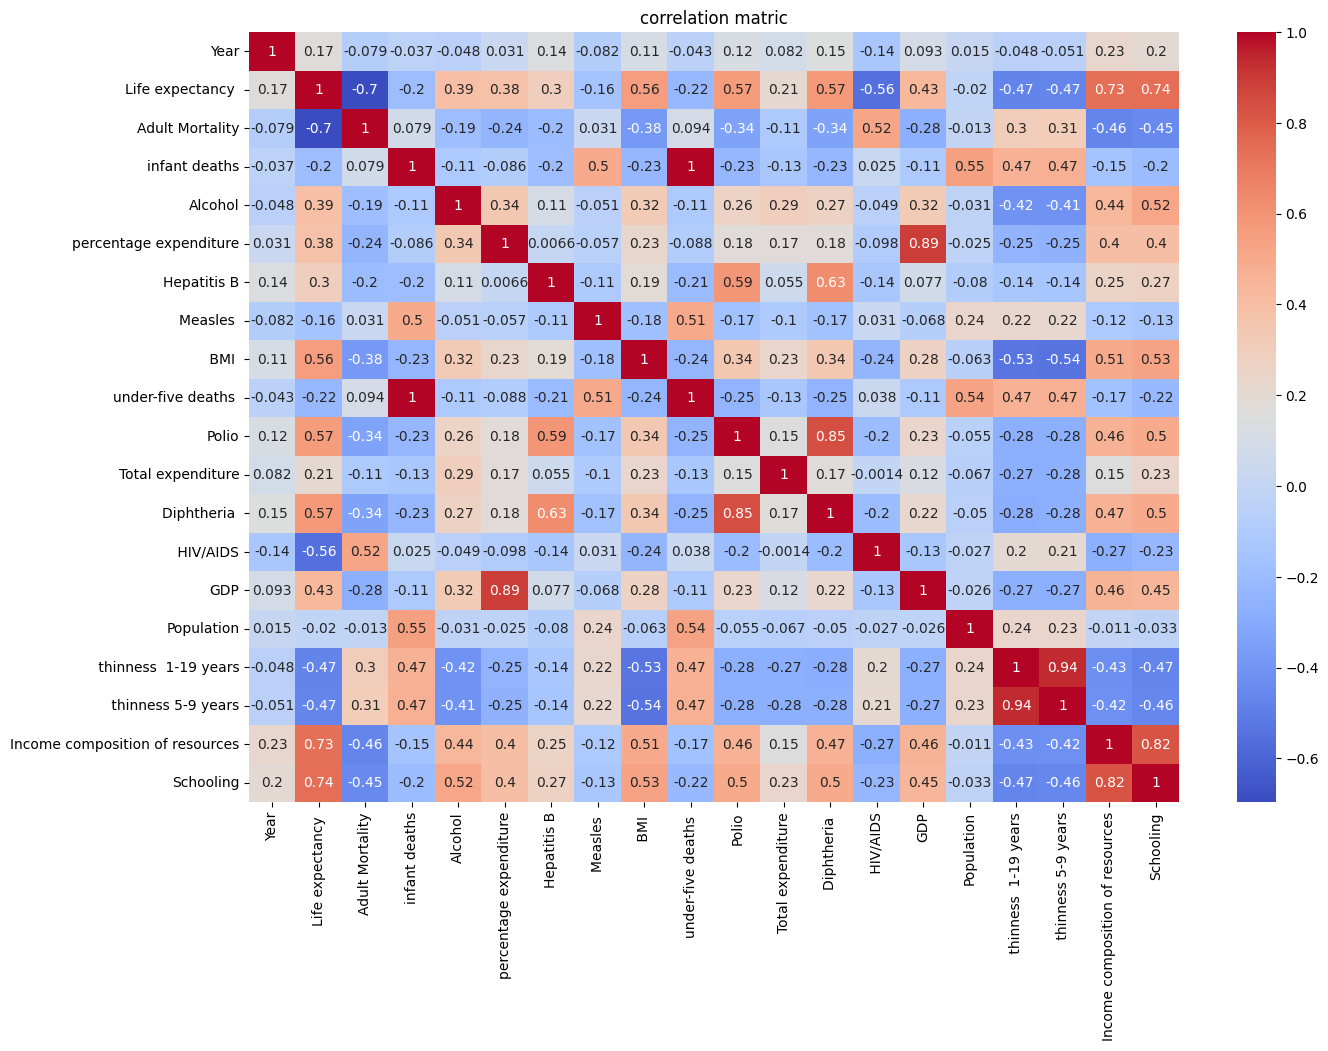

In [39]:
numeric_columns=data.select_dtypes(include=['float64','int64']).columns
cor=data[numeric_columns].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.title("correlation matric")
plt.show()

In [40]:
cols_to_encode=['Country',"Status"]
encoder=LabelEncoder()

In [41]:
for col in cols_to_encode:
  data[col]=encoder.fit_transform(data[col])

In [47]:
X=data.drop('Life expectancy ',axis=1)
y=data['Life expectancy ']

In [48]:
cols_to_scale=[
    'Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B',
    'Measles ',' BMI ','under-five deaths ',' HIV/AIDS',' thinness  1-19 years',' thinness 5-9 years','Country','Year',
    'Polio','Total expenditure','Population','GDP','Diphtheria ','Schooling','Income composition of resources'
]

In [49]:
scaler=MinMaxScaler()

In [50]:
X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
model=Sequential([
    Dense(64,activation='relu',input_dim=21),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [55]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,793 (38.25 KB)

 Trainable params: 9,793 (38.25 KB)

 Non-trainable params: 0 (0.00 B)

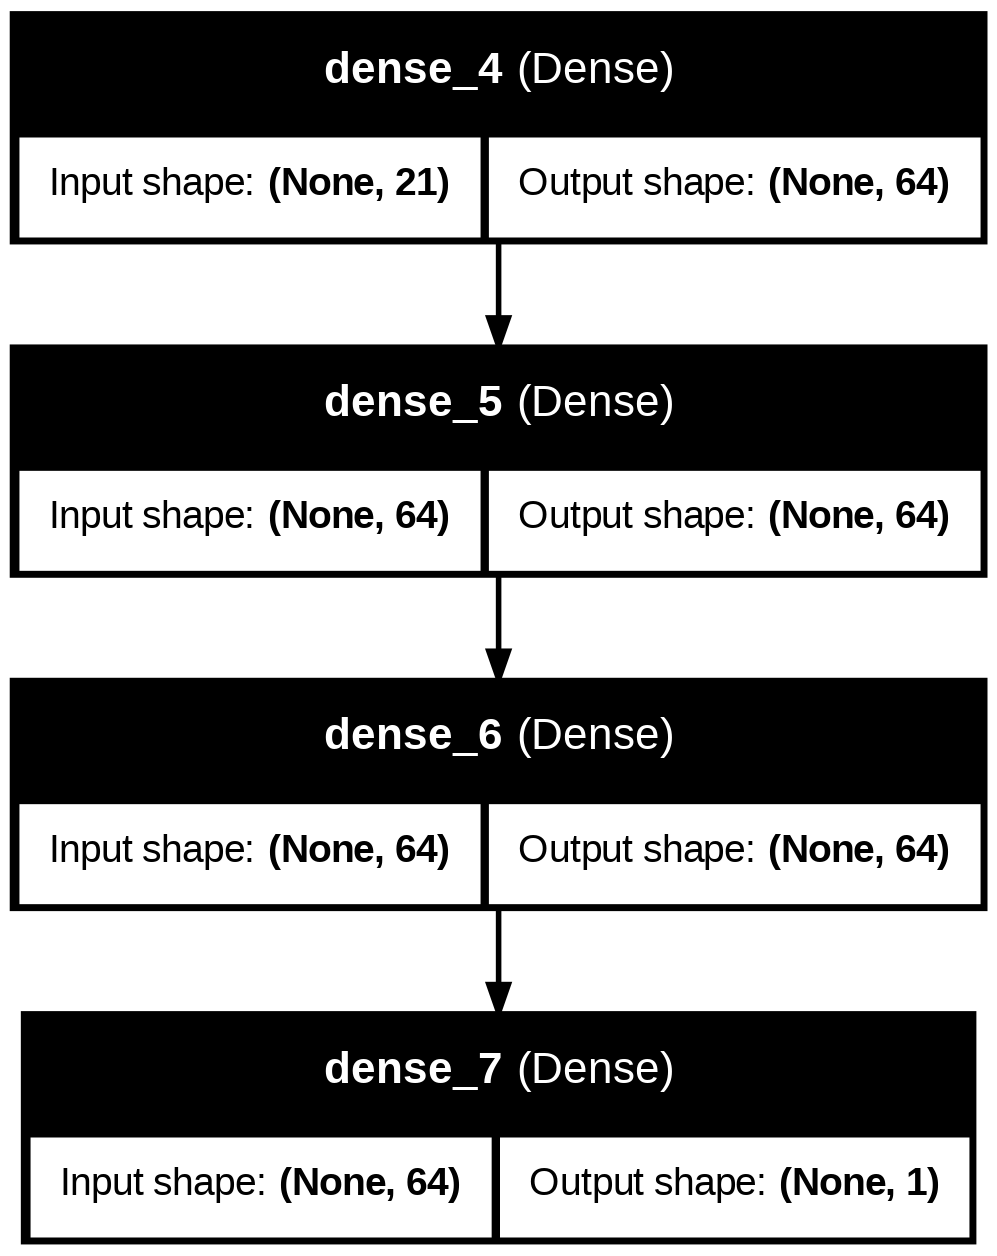

In [58]:
plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

In [59]:
history= model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 4544.1670 - mae: 66.5726 - val_loss: 780.2162 - val_mae: 26.6886
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 275.9301 - mae: 13.2418 - val_loss: 91.4979 - val_mae: 7.6339
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 91.3007 - mae: 7.5078 - val_loss: 74.9769 - val_mae: 6.9704
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.7980 - mae: 6.6764 - val_loss: 61.2339 - val_mae: 6.3231
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.7791 - mae: 5.7446 - val_loss: 45.0841 - val_mae: 5.3455
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.5496 - mae: 5.0574 - val_loss: 35.6140 - val_mae: 4.7267
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.0264 - mae: 4.4946 - val_loss: 26.6377 - val_mae: 4.0500
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.8028 - mae: 3.8578 - val_loss: 20.9502 - val_mae: 3.5513
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0

In [62]:
y_pred=model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [63]:
Accuracy=r2_score(y_test,y_pred)
print("Accuracy:",Accuracy)

Accuracy: 0.904679423284586
